# **ML Problem Regression**
DESCRIPTION: 
here in this problem we try to explore the relationship between the salary and the Experience in years.

---

## **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing the Dataset**

here we use the github repository to upload the csv files

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/payalsingla2102/ML-Repo/main/Regression%20Model/salary_data_ques1.csv')


## **Exploring the Dataset**

In [3]:
#lets see the dataset what it looks like
df


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [6]:
df['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [8]:
df.count().isnull()


YearsExperience    False
Salary             False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


**Clearly there are 30 observations in each column.**

There are no NULL, Missing values in the dataset 

The data is all in Numerical format. An apt representation would be a scatterplot.

As we can see that YearsExperience comes out to be an Independent Variable, while the Salary is a Dependant Variable.

## **Visualizing the Dataset**

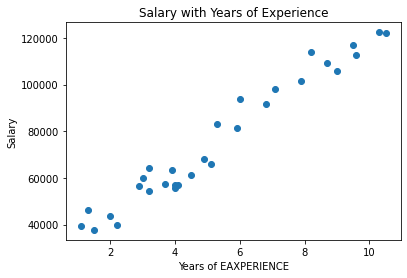

In [10]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of EAXPERIENCE')
plt.ylabel('Salary')
plt.title("Salary with Years of Experience")
plt.show()

## **Making the Model**

### **Prepare the Data**

In [11]:
X= df.iloc[:, :-1]
y= df.iloc[:,-1]


### **Test- Train Split**
intially we start with the 80-20 train-test split

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 0, test_size= 0.2)
X_train.shape , X_test.shape, y_train.shape, y_test.shape


((24, 1), (6, 1), (24,), (6,))

### **Importing the model and fitting**

In [25]:
#Importing the model 
from sklearn.linear_model import LinearRegression
l_regression = LinearRegression()

#fitting the model
l_regression.fit(X_train, y_train)




LinearRegression()

## **Results and Optimization**

### **Results**

In [26]:
#making the predictions
predictions = l_regression.predict(X_test)

#calculating the error
diff = y_test - predictions

#making a dataframe for the error
Error = pd.DataFrame(np.c_[y_test, predictions, diff], columns = ['Actual', 'Predicted','Difference'])
Error

,Actual,Predicted,Difference
0,37731.0,40748.961841,-3017.961841
1,122391.0,122699.622956,-308.622956
2,57081.0,64961.657170,-7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145
5,109431.0,107799.502753,1631.497247


### **Visualize the results**

**On training data**

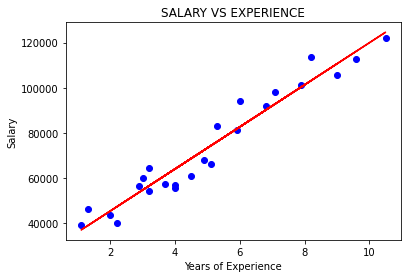

In [35]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, l_regression.predict(X_train), color= 'red')
plt.title('SALARY VS EXPERIENCE')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()




**On testing data**

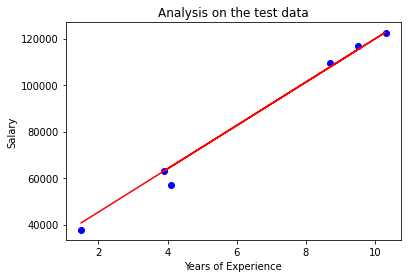

RMSE :  3580.98


In [36]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, l_regression.predict(X_test), color = 'red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title('Analysis on the test data')
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('RMSE : ',np.round(rmse,2))

**RSME Score**
Since we have the parameter of random_state the above predicted RMSE score cannot be accounted as the final score . So get a near accurate score we use cross fold validation to get the RMSE value 

A visual representation is given in the following image
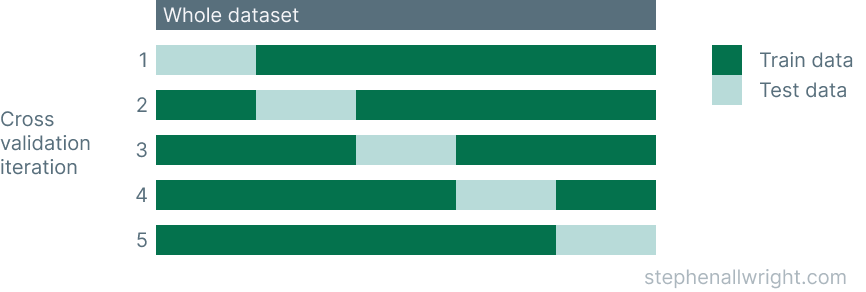

In [48]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(l_regression, X, y, cv= 4, scoring = "neg_root_mean_squared_error")
score


array([-5530.33672957, -7204.42174773, -6794.52655716, -5077.34894654])

## **Testing on custom data**

In [43]:
exp = input()
print(f'Salary of {exp} years preson is = {int(l_regression.predict([[exp]])[0])} thousands')


1.4
Salary of 1.4 years preson is = 39817 thousands


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
